### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



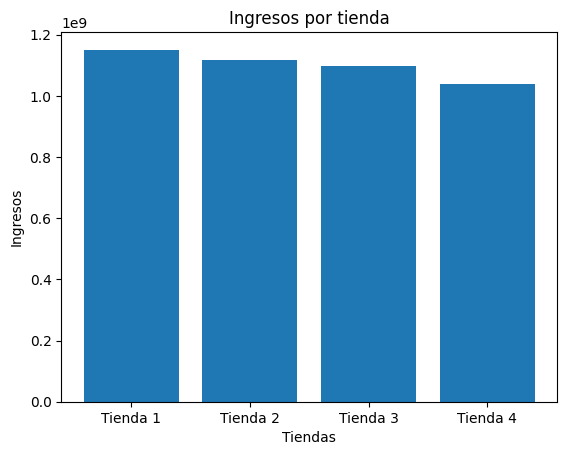

In [99]:
ingresos = [tienda.Precio.sum(), tienda2.Precio.sum(), tienda3.Precio.sum(), tienda4.Precio.sum()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.bar(tiendas, ingresos)
plt.title('Ingresos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.show()

In [5]:
ingresos

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

# 2. Ventas por categoría

In [6]:
ventas_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).to_frame()
ventas_tienda1.shape

(8, 1)

In [7]:
ventas_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).to_frame()
ventas_tienda2.shape

(8, 1)

In [8]:
ventas_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).to_frame()
ventas_tienda3.shape

(8, 1)

In [9]:
ventas_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).to_frame()
ventas_tienda4.shape

(8, 1)

In [10]:
ventas_tiendas = pd.concat([ventas_tienda1, ventas_tienda2, ventas_tienda3, ventas_tienda4], axis=1)
ventas_tiendas.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

<Axes: xlabel='Categoría del Producto'>

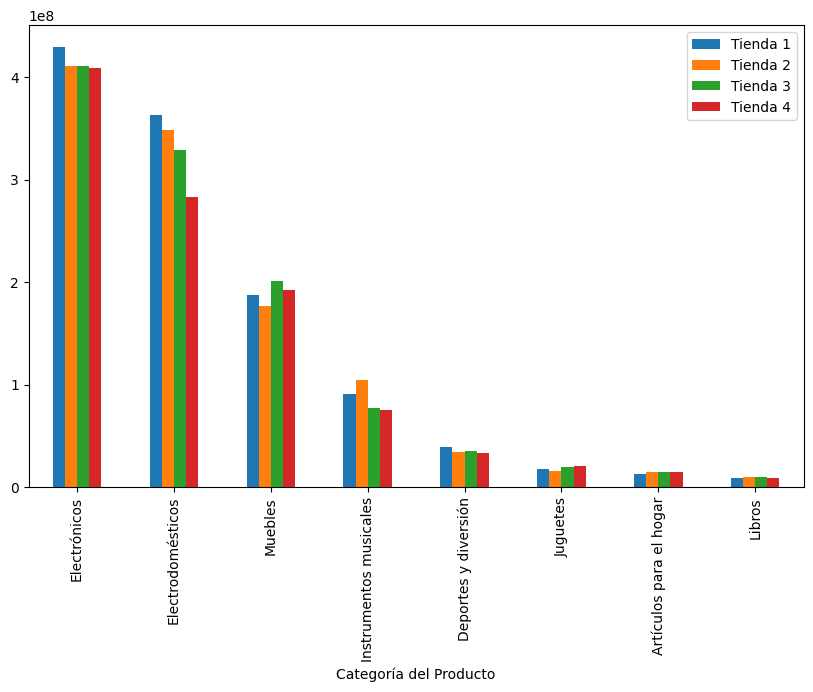

In [11]:
ventas_tiendas.plot(kind='bar', figsize=(10, 6))

In [109]:
ventas_tiendas

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0


# 3. Calificación promedio de la tienda


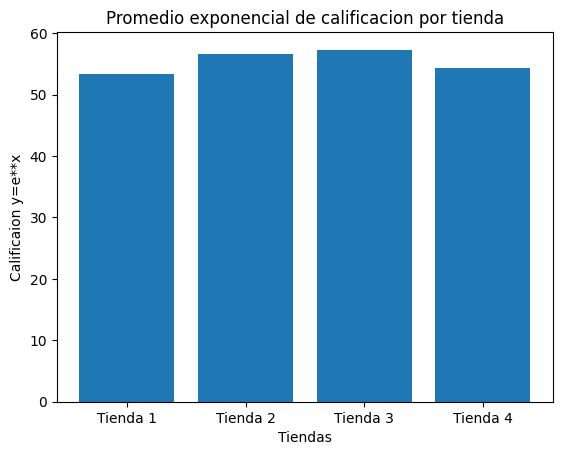

In [12]:
calificacion_promedio = [tienda['Calificación'].mean(), tienda2['Calificación'].mean(),
                         tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]
calificacion_promedio_exp = list(map(lambda x: math.exp(x), calificacion_promedio))
plt.bar(tiendas, calificacion_promedio_exp)
plt.title('Promedio exponencial de calificacion por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificaion y=e**x')
plt.show()

# 4. Productos más y menos vendidos

In [78]:
tienda1_mas_ventas = tienda['Producto'].value_counts().head(5).sort_values(ascending=True)
tienda2_mas_ventas = tienda2['Producto'].value_counts().head(5).sort_values(ascending=True)
tienda3_mas_ventas = tienda3['Producto'].value_counts().head(5).sort_values(ascending=True)
tienda4_mas_ventas = tienda4['Producto'].value_counts().head(5).sort_values(ascending=True)

Text(0.5, 1.0, 'Tienda 4')

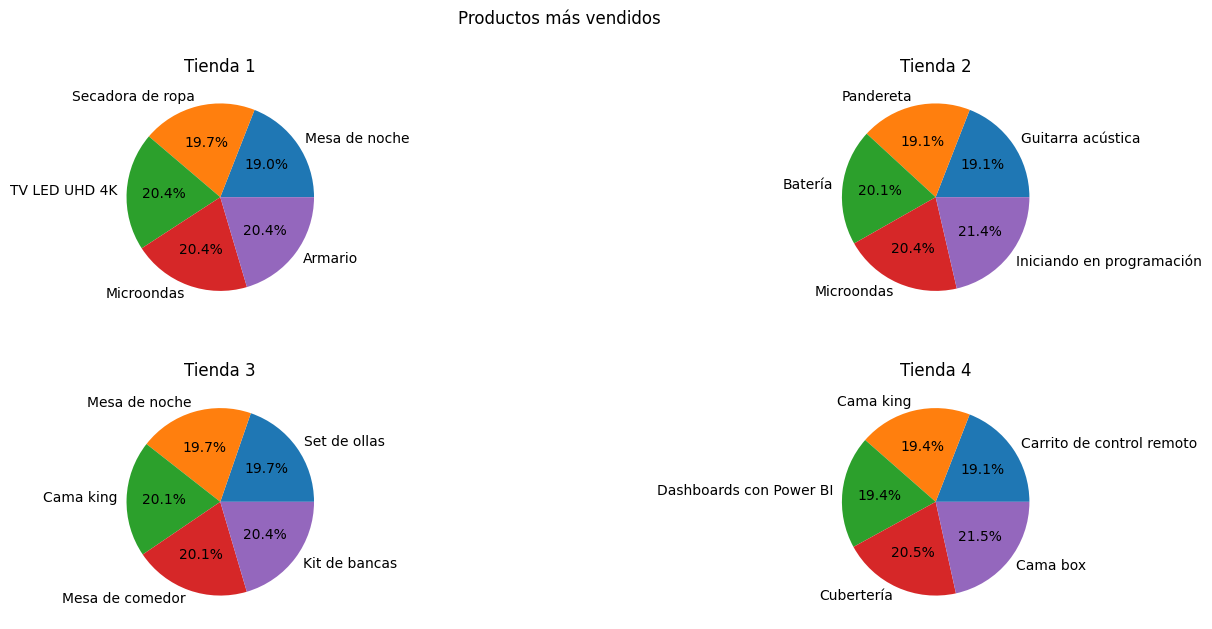

In [90]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle('Productos más vendidos')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
tienda1_mas_ventas.plot(kind='pie', ax=ax[0,0], ylabel='', autopct='%1.1f%%')
tienda2_mas_ventas.plot(kind='pie', ax=ax[0,1], ylabel='', autopct='%1.1f%%')
tienda3_mas_ventas.plot(kind='pie', ax=ax[1,0], ylabel='', autopct='%1.1f%%')
tienda4_mas_ventas.plot(kind='pie', ax=ax[1,1], ylabel='', autopct='%1.1f%%')

ax[0,0].set_title('Tienda 1')
ax[0,1].set_title('Tienda 2')
ax[1,0].set_title('Tienda 3')
ax[1,1].set_title('Tienda 4')


In [73]:
tienda1_menos_ventas = tienda['Producto'].value_counts().tail(5)
tienda2_menos_ventas = tienda2['Producto'].value_counts().tail(5)
tienda3_menos_ventas = tienda3['Producto'].value_counts().tail(5)
tienda4_menos_ventas = tienda4['Producto'].value_counts().tail(5)

Text(0.5, 1.0, 'Tienda 4')

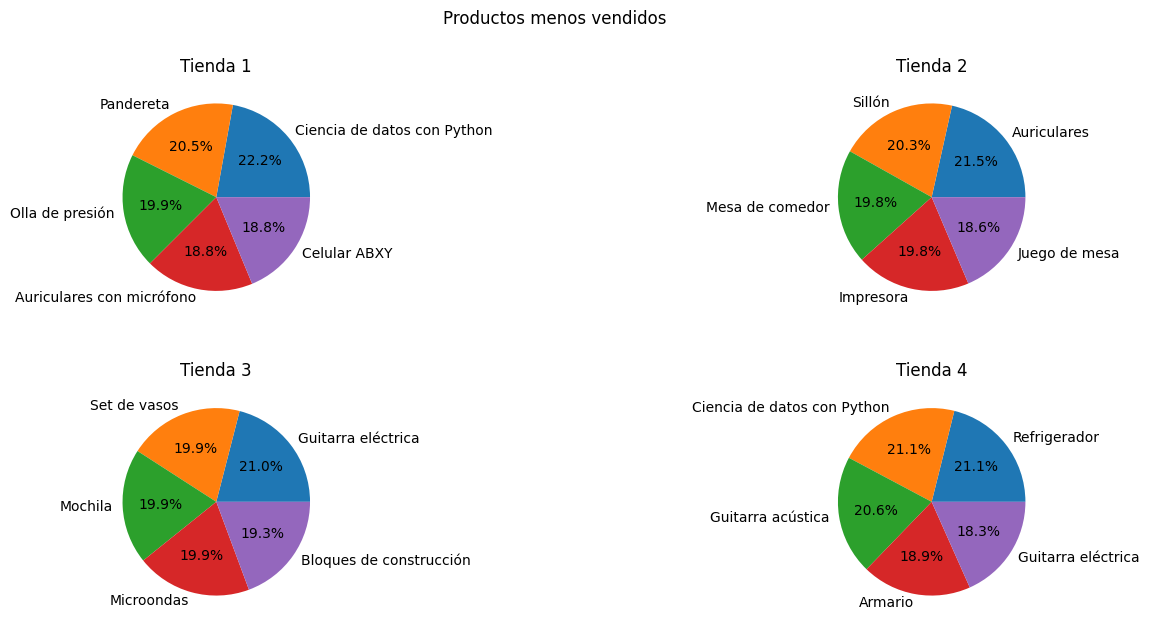

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle('Productos menos vendidos')
plt.subplots_adjust(wspace=0.6, hspace=0.3)
tienda1_menos_ventas.plot(kind='pie', ax=ax[0,0], ylabel='', autopct='%1.1f%%')
tienda2_menos_ventas.plot(kind='pie', ax=ax[0,1], ylabel='', autopct='%1.1f%%')
tienda3_menos_ventas.plot(kind='pie', ax=ax[1,0], ylabel='', autopct='%1.1f%%')
tienda4_menos_ventas.plot(kind='pie', ax=ax[1,1], ylabel='', autopct='%1.1f%%')

ax[0,0].set_title('Tienda 1')
ax[0,1].set_title('Tienda 2')
ax[1,0].set_title('Tienda 3')
ax[1,1].set_title('Tienda 4')

# 5. Envío promedio por tienda

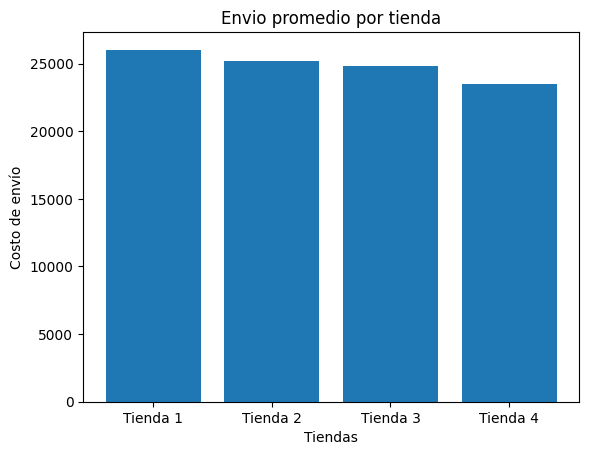

In [97]:
envio_promedio = [tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(),
            tienda4['Costo de envío'].mean()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.bar(tiendas, envio_promedio)
plt.title('Envio promedio por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo de envío')
plt.show()

In [102]:
envio_promedio

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

-Si los costes de envío promedio de Tienda 1 son mucho más altos que los de las otras tiendas (impactando margen neto), la ventaja de Tienda 1 podría reducirse o invertirse.

-Si el Sr. Juan valora reputación y satisfacción por encima de ingresos inmediatos, Tienda 3 (mejor calificación y fortaleza en Muebles) sería una alternativa seria.

-Si el comprador potencial busca nichos con productos estrella y alto crecimiento orgánico en ciertas categorías, Tienda 2 (productos con alta rotación individual y buena calificación) puede ser más atractiva.

In [122]:
lugar_tienda1 = tienda['Lugar de Compra'].value_counts()
lugar_tienda2 = tienda2['Lugar de Compra'].value_counts()
lugar_tienda3 = tienda3['Lugar de Compra'].value_counts()
lugar_tienda4 = tienda4['Lugar de Compra'].value_counts()
lugares_tiendas = pd.concat([lugar_tienda1, lugar_tienda2, lugar_tienda3, lugar_tienda4], axis = 1)
lugares_tiendas.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
lugares_tiendas_t = lugares_tiendas.T

<Axes: xlabel='Lugar de Compra'>

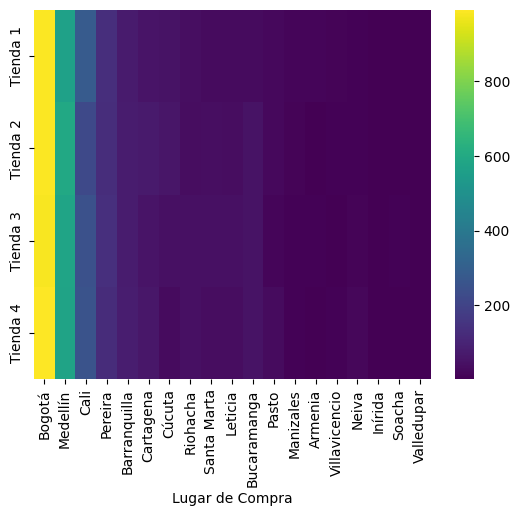

In [133]:
fig, ax = plt.subplots()
sns.heatmap(lugares_tiendas_t, annot=False, cmap='viridis', ax=ax)

<Axes: xlabel='Lugar de Compra', ylabel='Lugar de Compra'>

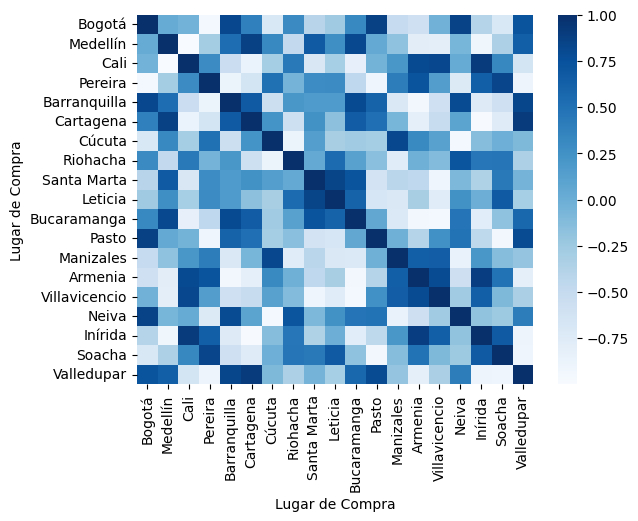

In [132]:
import numpy as np
corr_matrix = lugares_tiendas_t.corr()
sns.heatmap(corr_matrix, annot=False, cmap='Blues')

In [162]:
tienda1_coordenadas = pd.DataFrame({'Longitud':tienda['lon'], 'Latitud':tienda['lat'], 'label':'Tienda 1'})
tienda2_coordenadas = pd.DataFrame({'Longitud':tienda2['lon'], 'Latitud':tienda2['lat'], 'label':'Tienda 2'})
tienda3_coordenadas = pd.DataFrame({'Longitud':tienda3['lon'], 'Latitud':tienda3['lat'], 'label':'Tienda 3'})
tienda4_coordenadas = pd.DataFrame({'Longitud':tienda4['lon'], 'Latitud':tienda4['lat'], 'label':'Tienda 4'})

tiendas_coordenadas = pd.concat([tienda1_coordenadas, tienda2_coordenadas, tienda3_coordenadas, tienda4_coordenadas])


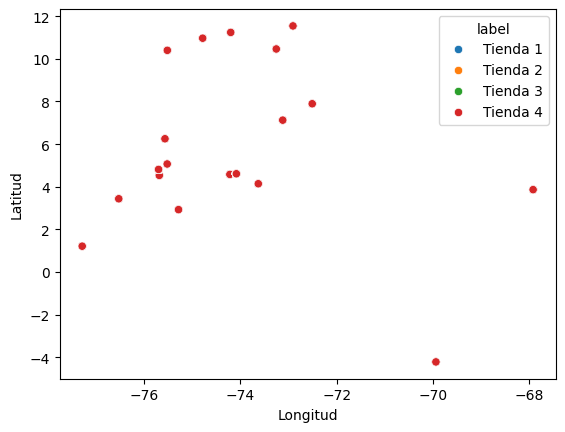

In [163]:
sns.scatterplot(data=tiendas_coordenadas, x='Longitud', y='Latitud', hue='label')
plt.show()